In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import os
import csv
import pandas as pd
import numpy as np

# Logistic Regression
### Data Pre-Processing

In [37]:
df = pd.read_csv("CAdemog1819.csv")

print(df.columns)
print(len(df))
df.head()
len(df)
print(df.dtypes)

Index(['CDS_CODE', 'NCES', 'Shoot', 'ENR_TOTAL', 'Female', 'Male',
       'Ethnicity Not Reported',
       'American Indian or Alaska Native, Not Hispanic', 'Asian, Not Hispanic',
       'Pacific Islander, Not Hispanic', 'Filipino, Not Hispanic',
       'Hispanic or Latino', 'African American, not Hispanic',
       'White, not Hispanic', 'Two or More Races, Not Hispanic', 'Female%',
       'Male%', 'Ethnicity Not Reported%',
       'American Indian or Alaska Native, Not Hispanic%',
       'Asian, Not Hispanic%', 'Pacific Islander, Not Hispanic%',
       'Filipino, Not Hispanic%', 'Hispanic or Latino%',
       'African American, not Hispanic%', 'White, not Hispanic%',
       'Two or More Races, Not Hispanic%', 'County Code', 'District Code',
       'School Code', 'County Name', 'District Name', 'School Name',
       'District Type', 'School Type', 'Charter School (Y/N)',
       'Charter School Number', 'Charter Funding Type', 'Enrollment (K-12)',
       'Free Meal Count (K-12)', 'Percen

In [39]:
df_select=df[[
'CDS_CODE', 'Shoot', 'ENR_TOTAL',
'Female%', 'Male%', 
    'Ethnicity Not Reported%',
    'American Indian or Alaska Native, Not Hispanic%',
    'Asian, Not Hispanic%',
    'Pacific Islander, Not Hispanic%',
    'Filipino, Not Hispanic%', 
    'Hispanic or Latino%',
    'African American, not Hispanic%', 
    'White, not Hispanic%',
    'Two or More Races, Not Hispanic%',     
'County Name', 'School Type', 'Charter School (Y/N)',
'Percent (%) Eligible Free (K-12)',
'Percent (%) Eligible FRPM (K-12)'
]]

df_select.head()

,CDS_CODE,Shoot,ENR_TOTAL,Female%,Male%,Ethnicity Not Reported%,"American Indian or Alaska Native, Not Hispanic%","Asian, Not Hispanic%","Pacific Islander, Not Hispanic%","Filipino, Not Hispanic%",Hispanic or Latino%,"African American, not Hispanic%","White, not Hispanic%","Two or More Races, Not Hispanic%",County Name,School Type,Charter School (Y/N),Percent (%) Eligible Free (K-12),Percent (%) Eligible FRPM (K-12)
0,3.066480e+13,NaN,739,0.484438,0.515562,0.004060,0.001353,0.320704,0.004060,0.046008,0.286874,0.056834,0.254398,0.025710,Orange,Elementary Schools (Public),No,0.33,0.38
1,3.066520e+13,NaN,366,0.546448,0.453552,0.002732,0.000000,0.702186,0.000000,0.002732,0.218579,0.000000,0.049180,0.024590,Orange,Elementary Schools (Public),No,0.51,0.61
2,3.073640e+13,NaN,611,0.453355,0.546645,0.003273,0.001637,0.026187,0.001637,0.009820,0.908347,0.016367,0.029460,0.003273,Orange,Intermediate/Middle Schools (Public),No,0.69,0.74
3,4.369370e+13,NaN,371,0.501348,0.498652,0.000000,0.000000,0.048518,0.008086,0.021563,0.884097,0.016173,0.005391,0.016173,Santa Clara,Elementary Schools (Public),No,0.71,0.87
4,1.563590e+13,NaN,165,0.521212,0.478788,0.000000,0.000000,0.006061,0.000000,0.000000,0.975758,0.006061,0.012121,0.000000,Kern,Intermediate/Middle Schools (Public),No,0.66,0.66


In [95]:
# df_select.CDS_CODE.value_counts()
df_select.Shoot.fillna(0, inplace=True)
print(df_select.Shoot.value_counts())
# df_select['Female%'].describe()
# df_select['Male%'].describe()
# df_select['County Name'].value_counts()
# df_select['School Type'].value_counts()
# df_select['Charter School (Y/N)'].value_counts()
# df_select['Charter School (Y/N)'].unique()
df_select['Charter School (Y/N)'] = df['Charter School (Y/N)'].replace({'No ': 'No'})
# df_select['Charter School (Y/N)'].value_counts()
# df_select['Enrollment (K-12)'].value_counts()
# df_select['Percent (%) Eligible Free (K-12)'].describe()
# df_select['Percent (%) Eligible FRPM (K-12)'].describe()
df_select.head()

0.0    6026
1.0      18
Name: Shoot, dtype: int64


C:\Users\soyou\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\soyou\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,CDS_CODE,Shoot,ENR_TOTAL,Female%,Male%,Ethnicity Not Reported%,"American Indian or Alaska Native, Not Hispanic%","Asian, Not Hispanic%","Pacific Islander, Not Hispanic%","Filipino, Not Hispanic%",Hispanic or Latino%,"African American, not Hispanic%","White, not Hispanic%","Two or More Races, Not Hispanic%",County Name,School Type,Charter School (Y/N),Percent (%) Eligible Free (K-12),Percent (%) Eligible FRPM (K-12)
0,3.066480e+13,0.0,739,0.484438,0.515562,0.004060,0.001353,0.320704,0.004060,0.046008,0.286874,0.056834,0.254398,0.025710,Orange,Elementary Schools (Public),No,0.33,0.38
1,3.066520e+13,0.0,366,0.546448,0.453552,0.002732,0.000000,0.702186,0.000000,0.002732,0.218579,0.000000,0.049180,0.024590,Orange,Elementary Schools (Public),No,0.51,0.61
2,3.073640e+13,0.0,611,0.453355,0.546645,0.003273,0.001637,0.026187,0.001637,0.009820,0.908347,0.016367,0.029460,0.003273,Orange,Intermediate/Middle Schools (Public),No,0.69,0.74
3,4.369370e+13,0.0,371,0.501348,0.498652,0.000000,0.000000,0.048518,0.008086,0.021563,0.884097,0.016173,0.005391,0.016173,Santa Clara,Elementary Schools (Public),No,0.71,0.87
4,1.563590e+13,0.0,165,0.521212,0.478788,0.000000,0.000000,0.006061,0.000000,0.000000,0.975758,0.006061,0.012121,0.000000,Kern,Intermediate/Middle Schools (Public),No,0.66,0.66


In [44]:
df_dropna = df_select.dropna()

print(df_dropna.dtypes)

print(len(df_dropna))

df_dropna.head()

CDS_CODE                                           float64
Shoot                                              float64
ENR_TOTAL                                            int64
Female%                                            float64
Male%                                              float64
Ethnicity Not Reported%                            float64
American Indian or Alaska Native, Not Hispanic%    float64
Asian, Not Hispanic%                               float64
Pacific Islander, Not Hispanic%                    float64
Filipino, Not Hispanic%                            float64
Hispanic or Latino%                                float64
African American, not Hispanic%                    float64
White, not Hispanic%                               float64
Two or More Races, Not Hispanic%                   float64
County Name                                         object
School Type                                         object
Charter School (Y/N)                                obje

,CDS_CODE,Shoot,ENR_TOTAL,Female%,Male%,Ethnicity Not Reported%,"American Indian or Alaska Native, Not Hispanic%","Asian, Not Hispanic%","Pacific Islander, Not Hispanic%","Filipino, Not Hispanic%",Hispanic or Latino%,"African American, not Hispanic%","White, not Hispanic%","Two or More Races, Not Hispanic%",County Name,School Type,Charter School (Y/N),Percent (%) Eligible Free (K-12),Percent (%) Eligible FRPM (K-12)
0,3.066480e+13,0.0,739,0.484438,0.515562,0.004060,0.001353,0.320704,0.004060,0.046008,0.286874,0.056834,0.254398,0.025710,Orange,Elementary Schools (Public),No,0.33,0.38
1,3.066520e+13,0.0,366,0.546448,0.453552,0.002732,0.000000,0.702186,0.000000,0.002732,0.218579,0.000000,0.049180,0.024590,Orange,Elementary Schools (Public),No,0.51,0.61
2,3.073640e+13,0.0,611,0.453355,0.546645,0.003273,0.001637,0.026187,0.001637,0.009820,0.908347,0.016367,0.029460,0.003273,Orange,Intermediate/Middle Schools (Public),No,0.69,0.74
3,4.369370e+13,0.0,371,0.501348,0.498652,0.000000,0.000000,0.048518,0.008086,0.021563,0.884097,0.016173,0.005391,0.016173,Santa Clara,Elementary Schools (Public),No,0.71,0.87
4,1.563590e+13,0.0,165,0.521212,0.478788,0.000000,0.000000,0.006061,0.000000,0.000000,0.975758,0.006061,0.012121,0.000000,Kern,Intermediate/Middle Schools (Public),No,0.66,0.66


In [45]:
df_dummies=pd.get_dummies(data=df_dropna,columns=['County Name', 'School Type', 'Charter School (Y/N)'])
print(df_dummies.columns)
# print(df_dummies.describe())
# print(df_dummies.head())
df_dummies.shape

Index(['CDS_CODE', 'Shoot', 'ENR_TOTAL', 'Female%', 'Male%',
       'Ethnicity Not Reported%',
       'American Indian or Alaska Native, Not Hispanic%',
       'Asian, Not Hispanic%', 'Pacific Islander, Not Hispanic%',
       'Filipino, Not Hispanic%', 'Hispanic or Latino%',
       'African American, not Hispanic%', 'White, not Hispanic%',
       'Two or More Races, Not Hispanic%', 'Percent (%) Eligible Free (K-12)',
       'Percent (%) Eligible FRPM (K-12)', 'County Name_Alameda',
       'County Name_Alpine', 'County Name_Amador', 'County Name_Butte',
       'County Name_Calaveras', 'County Name_Colusa',
       'County Name_Contra Costa', 'County Name_Del Norte',
       'County Name_El Dorado', 'County Name_Fresno', 'County Name_Glenn',
       'County Name_Humboldt', 'County Name_Imperial', 'County Name_Inyo',
       'County Name_Kern', 'County Name_Kings', 'County Name_Lake',
       'County Name_Lassen', 'County Name_Los Angeles', 'County Name_Madera',
       'County Name_Marin', 'Co

(6044, 92)

In [47]:
# Assign X (data) and y (target)

X = df_dummies.drop(columns=['CDS_CODE','Shoot'])
print(X.shape)
X.head()

(6044, 90)


,ENR_TOTAL,Female%,Male%,Ethnicity Not Reported%,"American Indian or Alaska Native, Not Hispanic%","Asian, Not Hispanic%","Pacific Islander, Not Hispanic%","Filipino, Not Hispanic%",Hispanic or Latino%,"African American, not Hispanic%",...,School Type_Intermediate/Middle Schools (Public),School Type_Junior High Schools (Public),School Type_Juvenile Court Schools,School Type_K-12 Schools (Public),School Type_Opportunity Schools,School Type_Special Education Schools (Public),School Type_State Special Schools,School Type_Youth Authority Facilities,Charter School (Y/N)_No,Charter School (Y/N)_Yes
0,739,0.484438,0.515562,0.004060,0.001353,0.320704,0.004060,0.046008,0.286874,0.056834,...,0,0,0,0,0,0,0,0,1,0
1,366,0.546448,0.453552,0.002732,0.000000,0.702186,0.000000,0.002732,0.218579,0.000000,...,0,0,0,0,0,0,0,0,1,0
2,611,0.453355,0.546645,0.003273,0.001637,0.026187,0.001637,0.009820,0.908347,0.016367,...,1,0,0,0,0,0,0,0,1,0
3,371,0.501348,0.498652,0.000000,0.000000,0.048518,0.008086,0.021563,0.884097,0.016173,...,0,0,0,0,0,0,0,0,1,0
4,165,0.521212,0.478788,0.000000,0.000000,0.006061,0.000000,0.000000,0.975758,0.006061,...,1,0,0,0,0,0,0,0,1,0


In [48]:
# YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY
y = df_dummies.Shoot
y.shape

(6044,)

## Train test split

In [49]:
# Split the data using train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y) # split to keep ratio of y value

In [50]:
y_train.value_counts()

0.0    4520
1.0      13
Name: Shoot, dtype: int64

# Logistic regression

In [52]:
# Create a logistic regression model
from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression()
Logistic

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
# Fit the model to the data
Logistic.fit(X_train, y_train)

C:\Users\soyou\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
# Validate the model using the test data
print(f"Training Data Score: {Logistic.score(X_train, y_train)}")
print(f"Testing Data Score: {Logistic.score(X_test, y_test)}")

Training Data Score: 0.9971321420692698
Testing Data Score: 0.9966909331568498


In [55]:
# Make predictions using the X_test and y_test data
# Print at least 10 predictions vs their actual labels
predictions = Logistic.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")
preds=pd.DataFrame({"Prediction": predictions, "Actual": y_test})
                    # use .reset_index(drop=True) to drop index
preds.head()

First 10 Predictions:   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
First 10 Actual labels: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


,Prediction,Actual
3564,0.0,0.0
3228,0.0,0.0
3309,0.0,0.0
4562,0.0,0.0
4457,0.0,0.0


In [56]:
from sklearn.metrics import classification_report
predictions = Logistic.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=["No shoot", "Shoot"]))

              precision    recall  f1-score   support

    No shoot       1.00      1.00      1.00      1506
       Shoot       0.00      0.00      0.00         5

    accuracy                           1.00      1511
   macro avg       0.50      0.50      0.50      1511
weighted avg       0.99      1.00      1.00      1511



C:\Users\soyou\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
# .to_csv('.csv',index=False)

# Decision Tree

In [58]:
from sklearn import tree
target = df_dummies['Shoot']
target_names = ['no shoot','shoot']

data = df_dummies.drop(columns=['CDS_CODE','Shoot'])
feature_names= data.columns

# Create a Decision Tree Classifier
DTclf = tree.DecisionTreeClassifier() # clf - classifier
# Fit the classifier to the data
DTclf.fit(X_train, y_train)

# score
DTclf.score(X_test,y_test)

0.9920582395764395

In [59]:
# for visualization I used the whole dataset
clf = tree.DecisionTreeClassifier()
clf = clf.fit(data, target)

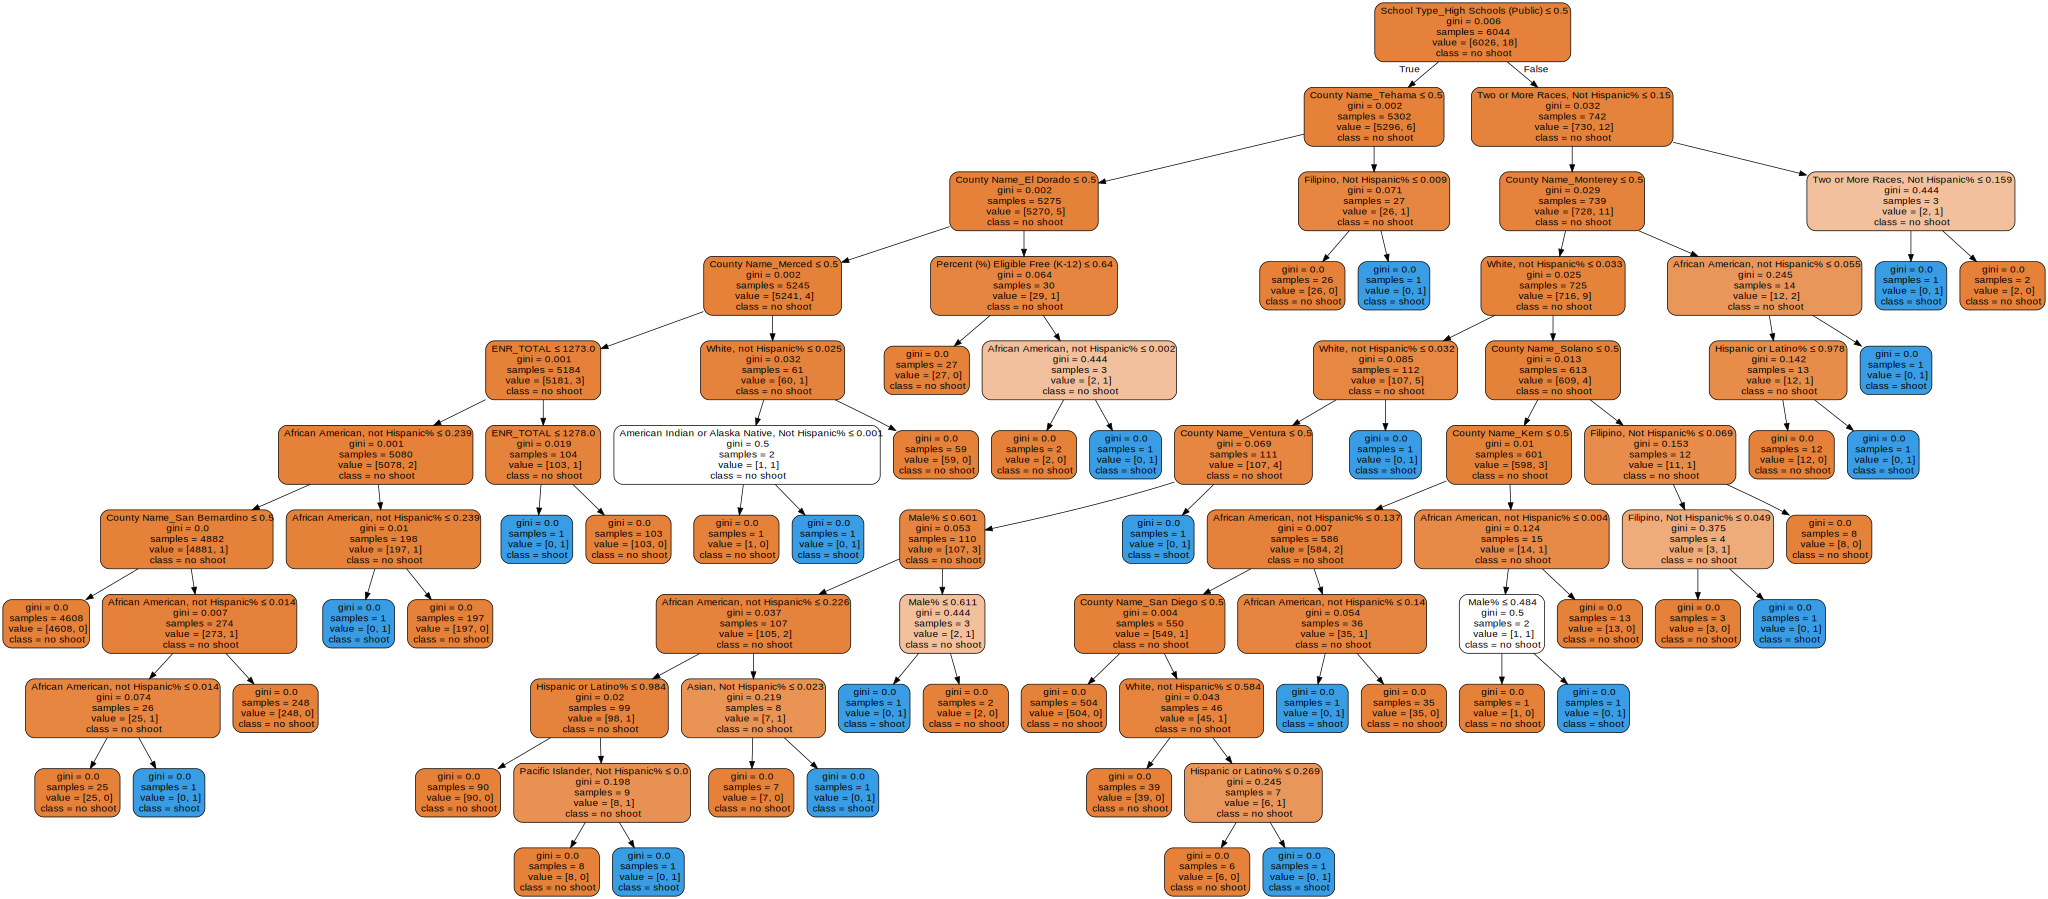

In [60]:
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=feature_names,  
    class_names=target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('decision_tree.png')

graph = graphviz.Source(dot_data)  
graph 

# Random Forrest

In [61]:
# Create, fit, and score a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100) # more number of estimators, possibility of overfitting
rf = rf.fit(X_train, y_train)

In [62]:
rf.score(X_test, y_test)

0.9966909331568498

In [63]:
importances = rf.feature_importances_
importances

array([9.05345028e-02, 7.29469278e-02, 6.95173125e-02, 3.26224939e-02,
       5.80730529e-02, 6.60372737e-02, 5.05076791e-02, 5.78373794e-02,
       6.63529844e-02, 6.86738966e-02, 6.79315983e-02, 8.02191445e-02,
       3.66531630e-02, 5.38726407e-02, 1.64258408e-04, 0.00000000e+00,
       0.00000000e+00, 2.14527075e-07, 0.00000000e+00, 0.00000000e+00,
       1.05519977e-05, 0.00000000e+00, 6.55555065e-03, 6.72510744e-03,
       3.48941736e-05, 0.00000000e+00, 1.05737724e-05, 9.03149487e-06,
       5.18479100e-05, 0.00000000e+00, 0.00000000e+00, 1.30849588e-05,
       9.90586543e-03, 4.73406167e-06, 9.29000049e-06, 0.00000000e+00,
       3.67353885e-06, 1.47030550e-06, 0.00000000e+00, 0.00000000e+00,
       1.40054460e-02, 0.00000000e+00, 0.00000000e+00, 7.65287488e-05,
       1.62732557e-05, 1.42574695e-07, 6.75989844e-04, 6.14616833e-03,
       1.55828214e-08, 5.10412110e-03, 1.14789738e-03, 0.00000000e+00,
       3.15139266e-04, 9.50509353e-07, 5.07970972e-06, 0.00000000e+00,
      

In [64]:
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.09053450276145159, 'ENR_TOTAL'),
 (0.08021914449064686, 'Two or More Races, Not Hispanic%'),
 (0.07294692782976175, 'Female%'),
 (0.06951731246287439, 'Male%'),
 (0.06867389658827633, 'African American, not Hispanic%'),
 (0.06793159833233924, 'White, not Hispanic%'),
 (0.06635298436340652, 'Hispanic or Latino%'),
 (0.06603727373526606, 'Asian, Not Hispanic%'),
 (0.05807305287505568, 'American Indian or Alaska Native, Not Hispanic%'),
 (0.0578373793853145, 'Filipino, Not Hispanic%'),
 (0.053872640700629866, 'Percent (%) Eligible FRPM (K-12)'),
 (0.05050767906006121, 'Pacific Islander, Not Hispanic%'),
 (0.03665316304998007, 'Percent (%) Eligible Free (K-12)'),
 (0.03262249390149627, 'Ethnicity Not Reported%'),
 (0.03251830674780275, 'School Type_High Schools (Public)'),
 (0.01400544603542429, 'County Name_Monterey'),
 (0.009905865427447692, 'County Name_Los Angeles'),
 (0.008883401480599476, 'County Name_Ventura'),
 (0.008834755265988448, 'County Name_Tehama'),
 (0.00672510743742305

# KNN
requires distant function to change dummy values..I won't go for this.

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

# SVM

In [65]:
from sklearn.svm import SVC 
SVMmodel = SVC(kernel='linear')
SVMmodel.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [66]:
# Print the model score using the test data
# Model Accuracy
print('Test Acc: %.3f' % SVMmodel.score(X_test, y_test))

Test Acc: 0.997


In [67]:
# try changing weight
from sklearn.svm import SVC
weighted_svm = SVC(kernel='linear', class_weight={0: 10})
weighted_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight={0: 10}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [68]:
# Model Accuracy
print('Test Acc: %.3f' % weighted_svm.score(X_test, y_test))

Test Acc: 0.997


In [69]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = SVMmodel.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=["no shoot", "shoot"]))

              precision    recall  f1-score   support

    no shoot       1.00      1.00      1.00      1506
       shoot       0.00      0.00      0.00         5

    accuracy                           1.00      1511
   macro avg       0.50      0.50      0.50      1511
weighted avg       0.99      1.00      1.00      1511



C:\Users\soyou\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [70]:
# for weighted model
predictions = weighted_svm.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=["no shoot", "shoot"]))

              precision    recall  f1-score   support

    no shoot       1.00      1.00      1.00      1506
       shoot       0.00      0.00      0.00         5

    accuracy                           1.00      1511
   macro avg       0.50      0.50      0.50      1511
weighted avg       0.99      1.00      1.00      1511



C:\Users\soyou\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Deep Learning

In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

didn't scale because of dummy variables

In [79]:
# # Encode for y
# # Step 1: Label-encode data set
# label_encoder = LabelEncoder()
# label_encoder.fit(y_train)
# encoded_y_train = label_encoder.transform(y_train)
# encoded_y_test = label_encoder.transform(y_test)

In [72]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [73]:
# Create an empty sequential model
deepmodel = Sequential()

In [74]:
# Add the first layer where the input dimensions are the columns of the training data
deepmodel.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))

In [75]:
# Add a second hidden layer
deepmodel.add(Dense(100, activation='relu'))

In [76]:
# The output layer has 2 columns that are one-hot encoded
y_train_categorical.shape

(4533, 2)

In [77]:
# Add output layer
deepmodel.add(Dense(y_train_categorical.shape[1], activation="softmax"))

In [78]:
# Compile the model using categorical_crossentropy for the loss function, the adam optimizer,
# and add accuracy to the training metrics
deepmodel.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])

In [79]:
deepmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               9100      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 19,402
Trainable params: 19,402
Non-trainable params: 0
_________________________________________________________________


In [80]:
# Use the training data to fit (train) the model
deepmodel.fit(
    X_train,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

W0812 17:46:50.615541 13968 deprecation.py:323] From C:\Users\soyou\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 4533 samples
Epoch 1/100
4533/4533 - 1s - loss: 0.2706 - accuracy: 0.9764
Epoch 2/100
4533/4533 - 0s - loss: 0.0463 - accuracy: 0.9971
Epoch 3/100
4533/4533 - 0s - loss: 0.0462 - accuracy: 0.9971
Epoch 4/100
4533/4533 - 0s - loss: 0.0462 - accuracy: 0.9971
Epoch 5/100
4533/4533 - 0s - loss: 0.0462 - accuracy: 0.9971
Epoch 6/100
4533/4533 - 0s - loss: 0.0462 - accuracy: 0.9971
Epoch 7/100
4533/4533 - 0s - loss: 0.0462 - accuracy: 0.9971
Epoch 8/100
4533/4533 - 0s - loss: 0.0462 - accuracy: 0.9971
Epoch 9/100
4533/4533 - 0s - loss: 0.0462 - accuracy: 0.9971
Epoch 10/100
4533/4533 - 0s - loss: 0.0462 - accuracy: 0.9971
Epoch 11/100
4533/4533 - 0s - loss: 0.0462 - accuracy: 0.9971
Epoch 12/100
4533/4533 - 0s - loss: 0.0462 - accuracy: 0.9971
Epoch 13/100
4533/4533 - 0s - loss: 0.0462 - accuracy: 0.9971
Epoch 14/100
4533/4533 - 0s - loss: 0.0462 - accuracy: 0.9971
Epoch 15/100
4533/4533 - 0s - loss: 0.0462 - accuracy: 0.9971
Epoch 16/100
4533/4533 - 0s - loss: 0.0462 - accuracy: 0.

In [81]:
# Evaluate the model using the testing data
model_loss, model_accuracy = deepmodel.evaluate(X_test, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1511/1511 - 0s - loss: 0.0533 - accuracy: 0.9967
Loss: 0.05333596795383153, Accuracy: 0.9966909289360046


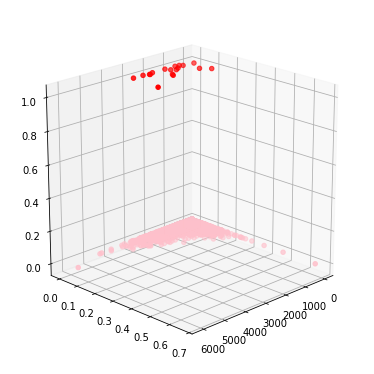

In [82]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
y_reshaped=df_dummies.Shoot.values.reshape(-1,1)

# print(y_reshaped)
X_0 = df_dummies.ENR_TOTAL.values.reshape(-1,1)
# print(X_0)
X_1 = df_dummies['Two or More Races, Not Hispanic%'].values.reshape(-1,1)

col = np.where(y==0, 'pink', 'red')
axes.scatter(X_0, X_1, y_reshaped, c=col, cmap=plt.cm.get_cmap("Spectral"))
plt.show()

# Resampling

In [85]:
# Resample to produce more classes from the minority

from sklearn.utils import resample
# concatenate our training data back together
Train_concat = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
no_shoot = Train_concat[Train_concat.Shoot==0]
shoot = Train_concat[Train_concat.Shoot==1]

# upsample minority
shoot_upsampled = resample(shoot,
                          replace=True, # sample with replacement
                          n_samples=len(no_shoot), # match number in majority class
                          random_state=25) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([no_shoot, shoot_upsampled])

# check new class counts
upsampled.Shoot.value_counts()

1.0    4520
0.0    4520
Name: Shoot, dtype: int64

In [86]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.Shoot
X_train = upsampled.drop('Shoot', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

# Checking accuracy
print(classification_report(y_test, upsampled_pred,
                            target_names=["no shoot", "shoot"]))

              precision    recall  f1-score   support

    no shoot       1.00      0.92      0.96      1506
       shoot       0.02      0.40      0.03         5

    accuracy                           0.92      1511
   macro avg       0.51      0.66      0.50      1511
weighted avg       0.99      0.92      0.96      1511



In [87]:
# downsample minority
no_shoot_downsampled = resample(no_shoot,
                          replace=False, # sample w/o replacement
                          n_samples=len(shoot), # match minority n
                          random_state=27) # reproducible results

# combine majority and upsampled minority
downsampled = pd.concat([no_shoot_downsampled, shoot])

# check new class counts
downsampled.Shoot.value_counts()

1.0    13
0.0    13
Name: Shoot, dtype: int64

In [88]:
# trying logistic regression again with the balanced dataset
y_train = downsampled.Shoot
X_train = downsampled.drop('Shoot', axis=1)

downsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

downsampled_pred = downsampled.predict(X_test)

# Checking accuracy
print(classification_report(y_test, downsampled_pred,
                            target_names=["no shoot", "shoot"]))

              precision    recall  f1-score   support

    no shoot       1.00      0.70      0.82      1506
       shoot       0.01      1.00      0.02         5

    accuracy                           0.70      1511
   macro avg       0.51      0.85      0.42      1511
weighted avg       1.00      0.70      0.82      1511



In [94]:
from imblearn.over_sampling import SMOTE
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)
print(y_train)

[0. 0. 0. ... 1. 1. 1.]


In [91]:
# trying logistic regression again with the synthetic dataset

smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# Checking accuracy
print(classification_report(y_test, smote_pred,
                            target_names=["no shoot", "shoot"]))

              precision    recall  f1-score   support

    no shoot       1.00      0.94      0.97      1506
       shoot       0.01      0.20      0.02         5

    accuracy                           0.93      1511
   macro avg       0.50      0.57      0.49      1511
weighted avg       0.99      0.93      0.96      1511

